# 6.2 Sailingyacht in a gust

In [82]:
import pandas as pd
from mms185 import simpson
from mms185.sympy import lambdify,run
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

import numpy as np
from numpy import arctan,tan, sin, cos
from sympy import symbols, Eq
import sympy as sp
import pandas as pd
from sympy import Eq,symbols
from mms185.sympy import lambdify,run
from mms185.helpers import interpolate
from scipy.integrate import cumtrapz

In [83]:
meta_data = {
    'Delta':46.7,  # [t]
    'GM':0.5,  # [m]
    'mass':46.7,  # [t]
}


In [13]:
WHL,phi,mass,t_m = symbols("WHL,phi,Delta,t_m")

In [14]:
eq_WHL = Eq(WHL,9*sp.cos(phi)*t_m/mass)
eq_WHL

Eq(WHL, 9*t_m*cos(phi)/Delta)

In [15]:
eq_t_m = Eq(t_m, sp.solve(eq_WHL.subs(phi,0),t_m)[0])
eq_t_m

Eq(t_m, Delta*WHL/9)

In [16]:
lambdify(eq_t_m)

<function _lambdifygenerated(Delta, WHL)>

In [17]:
meta_data['t_m'] = run(lambdify(eq_t_m),meta_data,WHL=0.193)

In [59]:
df = pd.DataFrame()
df['phi_deg'] = [0, 10,20,30,40,50,60]
df['MS'] = np.array([0, -3, -14, -35, -76, -161, -263,])/1000  # [m]
df['phi']=np.deg2rad(df['phi_deg'])
df['GZ'] = df['MS'] + meta_data['GM']*sin(df['phi'])
df.set_index('phi_deg',inplace=True)

df['WHL'] = run(lambdify(eq_WHL), df, **meta_data)
df

,MS,phi,GZ,WHL
phi_deg,,,,
0,0.000,0.000000,0.000000,0.193000
10,-0.003,0.174533,0.083824,0.190068
20,-0.014,0.349066,0.157010,0.181361
30,-0.035,0.523599,0.215000,0.167143
40,-0.076,0.698132,0.245394,0.147847
50,-0.161,0.872665,0.222022,0.124058
60,-0.263,1.047198,0.170013,0.096500


Text(0, 0.5, 'Lever $[m]$')

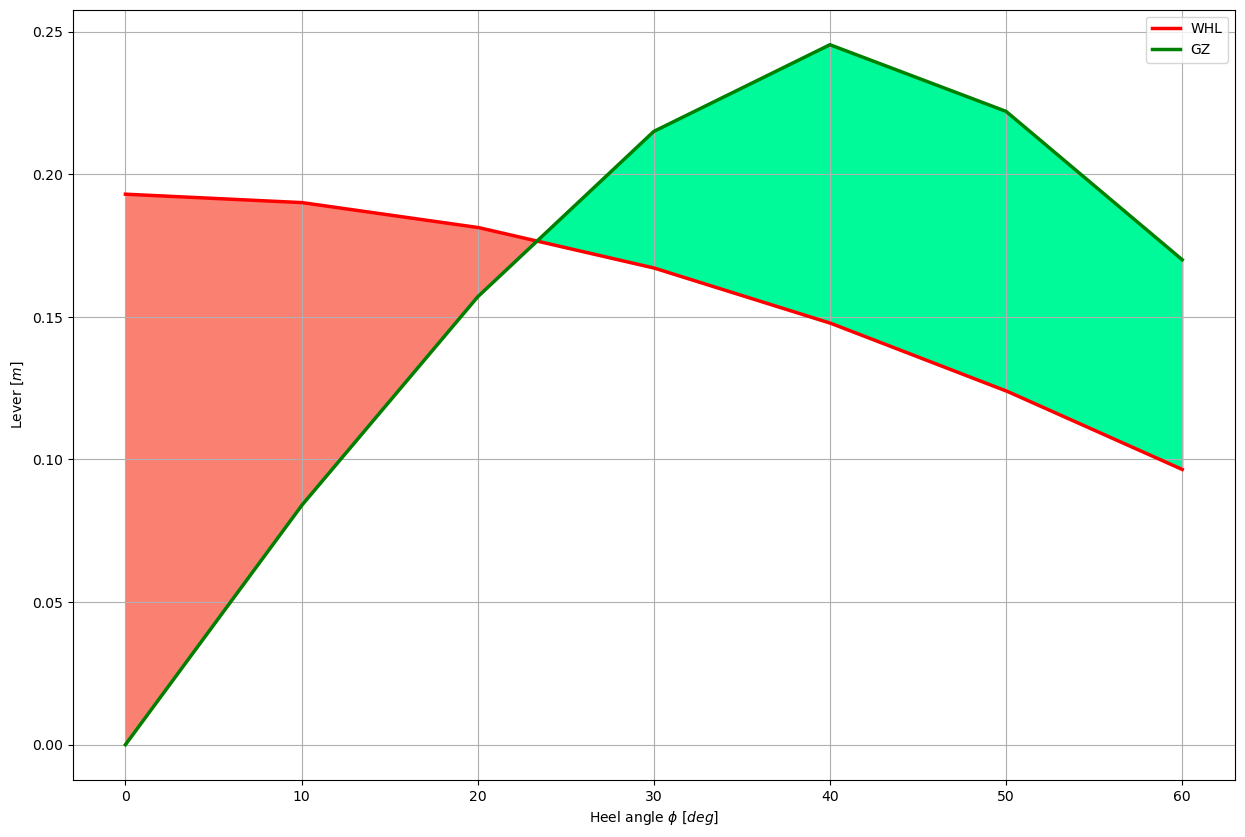

In [77]:
df_plot = interpolate(df=df)
fig,ax=plt.subplots()
df_plot.plot(y=['WHL','GZ'],color=['r','g'], lw=2.5, ax=ax)

mask = df_plot['WHL'] > df_plot['GZ']
df_ = df_plot.loc[mask]
ax.fill_between(df_.index,y1=df_['WHL'],y2=df_['GZ'], color='salmon')

mask = df_plot['WHL'] < df_plot['GZ']
df_ = df_plot.loc[mask]
ax.fill_between(df_.index,y1=df_['WHL'],y2=df_['GZ'], color='mediumspringgreen')

ax.grid(True)
ax.set_xlabel(f"Heel angle $\phi$ $[deg]$")
ax.set_ylabel(f"Lever $[m]$")

In [84]:
df['e'] = np.concatenate(([0],cumtrapz(df['GZ'], x=df['phi'])))
df['W'] = df['e']*meta_data['mass']

In [85]:
df['W_W'] = np.concatenate(([0],cumtrapz(df['WHL'], x=df['phi'])))*meta_data['mass']

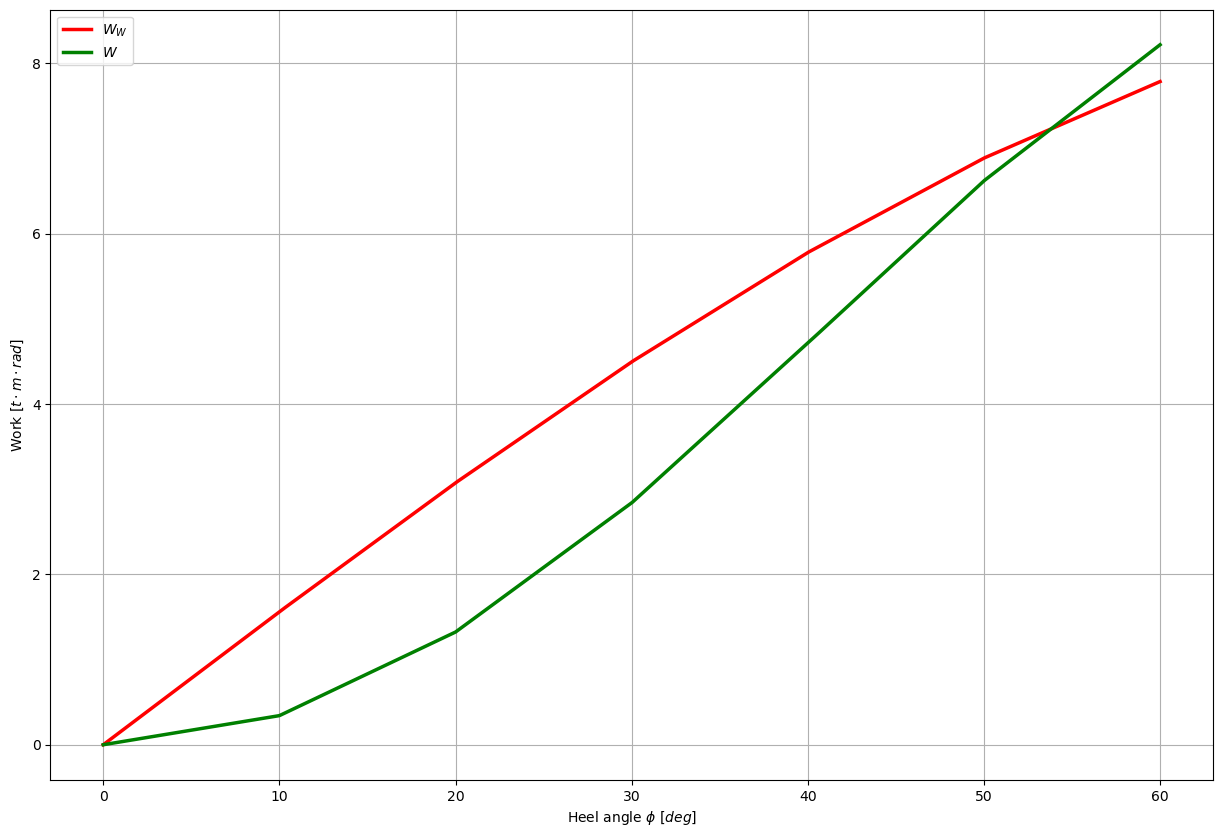

In [90]:
df_plot = interpolate(df=df)
fig,ax=plt.subplots()
df_plot.plot(y=['W_W','W'],color=['r','g'], label=[r'$W_W$',r'$W$'], lw=2.5, ax=ax)

ax.grid(True)
ax.set_xlabel(r"Heel angle $\phi$ $[deg]$")
ax.set_ylabel(r"Work $[t \cdot m \cdot rad]$");

Text(0, 0.5, 'Lever $[m]$')

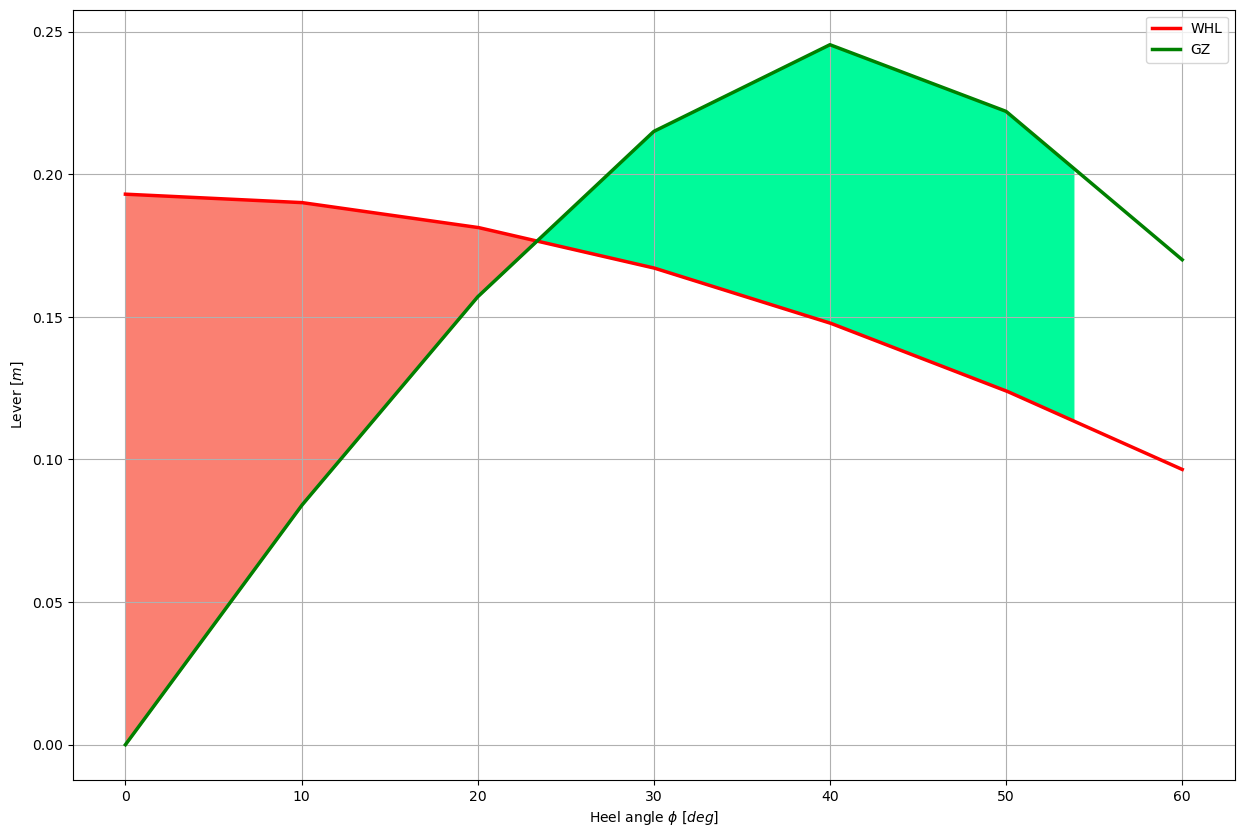

In [81]:
fig,ax=plt.subplots()
df_plot.plot(y=['WHL','GZ'],color=['r','g'], lw=2.5, ax=ax)

mask = df_plot['WHL'] > df_plot['GZ']
df_ = df_plot.loc[mask]
ax.fill_between(df_.index,y1=df_['WHL'],y2=df_['GZ'], color='salmon')

mask = ((df_plot['WHL'] < df_plot['GZ']) & (df_plot['WHL_e'] > df_plot['e']))
df_ = df_plot.loc[mask]
ax.fill_between(df_.index,y1=df_['WHL'],y2=df_['GZ'], color='mediumspringgreen')

ax.grid(True)
ax.set_xlabel(f"Heel angle $\phi$ $[deg]$")
ax.set_ylabel(f"Lever $[m]$")